In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import decomposition

import matplotlib.pyplot as plt

In [2]:
# Leo la tabla de películas
movies = pd.read_csv('data/movies/movies.csv')

# Leo cuántos tags diferentes tengo
print ('... Leyeding tags')
tags = []
for indx in movies.index:
    genres = movies.at[indx, 'genres']
    genres_list = genres.split('|')
    tags.extend(genres_list)
    tags = list(set(tags))
    
print (f'\tAll possible tags are: {", ".join(tags)}')
       
# Creo una tabla con (0,1) para cada película/categoría
tagged_data = []
for indx in movies.index:
    genres = movies.at[indx, 'genres']
    genres_list = genres.split('|')
    movie_tags_list = [1 if t in genres_list else 0 for t in tags]
    tagged_data.append(movie_tags_list)

print ('... Saving infor for later. Maybe. Im not sure.')
# Ahora, guardo esa información de tags en un DataFrame de pandas
data = pd.DataFrame(tagged_data, columns=tags)

... Leyeding tags
	All possible tags are: Adventure, Fantasy, Comedy, Film-Noir, Action, Crime, Horror, Sci-Fi, (no genres listed), Children, Romance, Animation, Documentary, Drama, IMAX, Western, Thriller, Mystery, War, Musical
... Saving infor for later. Maybe. Im not sure.


# KMeans

In [3]:
# En este contexto de aprendizaje no supervisado, no hay target values: es decir, nuay y
X = tagged_data
np.shape(X)

(9742, 20)

In [4]:
# haré sólo 10 clusters.
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=82).fit(X)

In [5]:
pelis, _ = movies.shape

### Sistema de recomendación

In [6]:
#Selecciono una pelicula equis
#peli = np.random.randint(pelis)
peli = 0 # Uncomment this line to set peli = 0, selecting Toy Story
#Obtengo sus generos
peli_name = movies.at[peli,'title']
peli_genres = movies.at[peli, 'genres']
#Separo los tags
peli_genres_list = peli_genres.split('|')
# peli_genres_list = ['Action','Western','Fantasy'] # Uncomment these linen for La película rara de Flor
# peli_name = 'La pelicula rara de Flor'  # Uncomment these linen for La película rara de Flor
peli_tags_list = [1 if t in peli_genres_list else 0 for t in tags]
#peli_cluster = kmeans.predict([peli_tags_list]) ##m1
peli_cluster = kmeans.labels_[peli] ##m2

peli_name, peli_cluster

('Toy Story (1995)', 2)

In [7]:
# REPORTING:
recomendeishon = [i for i,cl in enumerate(kmeans.labels_) if (cl == peli_cluster and i != peli)]
count = len(recomendeishon)
random.shuffle(recomendeishon)
print (f'If you like the movie "{peli_name}", you may also like:')
p_recomendeishon = [movies.at[r,'title'] for r in recomendeishon]
[print(f'\t- {TITLE}') for TITLE in p_recomendeishon[:10]];

If you like the movie "Toy Story (1995)", you may also like:
	- Futurama: Bender's Game (2008)
	- Shanghai Noon (2000)
	- The Fox and the Hound 2 (2006)
	- Indiana Jones and the Last Crusade (1989)
	- Into the Woods (1991)
	- Hunt For Gollum, The (2009)
	- Cat Returns, The (Neko no ongaeshi) (2002)
	- Hardcore Henry (2015)
	- Time Bandits (1981)
	- Looney Tunes: Back in Action (2003)


## Manifolding - Isomap

In [8]:
# War, Action, Horror, Children, Film-Noir, Drama, Crime, Adventure, Sci-Fi, Thriller, Mystery, Comedy,
# Western, Fantasy, Animation, Documentary, Romance, IMAX, (no genres listed), Musical
tags = ['War',
        'Action',
        'Horror',
        'Children',
        'Film-Noir',
        'Drama',
        'Crime',
        'Adventure',
        'Sci-Fi',
        'Thriller',
        'Mystery',
        'Comedy',
        'Western',
        'Fantasy',
        'Animation',
        'Documentary',
        'Romance',
        'IMAX',
        '(no genres listed)',
        'Musical']
sensitive_tags = ['War', 'Horror', 'Crime']
tags_val = [1 if tag != '(no genres listed)' else 0 for tag in tags]
tags_val = [tval+2 if tag in sensitive_tags else tval for tag, tval in zip(tags,tags_val)]

# ========================================================
# INPUt: p1  [list] point coords x,y
#        p2  [list] point coords x,y
# OOUTPUT:   Distance between p1 and p2
# ========================================================
def distance(p1, p2):
    global tags_val
    #return sum([tag*(abs(x1-x2)) for x1,x2,tag in zip(p1,p2,tags_val)])
    return sum(tags_val*abs(p1-p2))

In [9]:
colors = ['blue', 'red', 'green', 'purple', 'cyan',
          'darkred', 'orangered', 'royalblue', 'tan', 'orange']
c = np.array([colors[l] for l in kmeans.labels_])

In [22]:
number_components = 3
print (f'... Creating manifold Isomap method. {number_components} components')
embedding = Isomap(n_components=number_components)
X_transformed = embedding.fit_transform(tagged_data)
print ('... Done.')
print (f'\t Data shape is {X_transformed.shape}')
if number_components == 2:
    cs = c
elif number_components == 3:
    cs = X_transformed[:,2]
else:
    cs = c

... Creating manifold Isomap method. 3 components
... Done.
	 Data shape is (9742, 3)


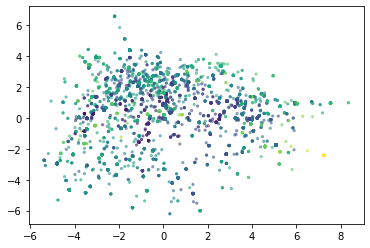

In [23]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=cs, s=5, alpha=0.5)
# draw centers
plt.show()

### Plotting recomendation

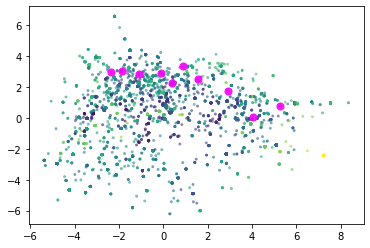

In [24]:
R = recomendeishon[:10]
X_transformed = np.array(X_transformed)
recommended = X_transformed[R]
c_r = c[R]
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=cs, s=4, alpha=0.5)
plt.scatter(recommended[:,0], recommended[:,1], c='fuchsia', s=50, alpha=0.9)
plt.show()

## Manifolding - LocallyLinearEmbedding

In [13]:
number_components = 2
print (f'... Creating manifold LocallyLinearEmbedding method. {number_components} components')
embedding2 = LocallyLinearEmbedding(n_components=number_components)
X_transformed2 = embedding2.fit_transform(tagged_data)
print ('... Done.')
print (f'\t Data shape is {X_transformed2.shape}')
if number_components == 2:
    cs = c
elif number_components == 3:
    cs = X_transformed2[:,2]
else:
    cs = c

... Creating manifold LocallyLinearEmbedding method. 2 components
... Done.
	 Data shape is (9742, 2)


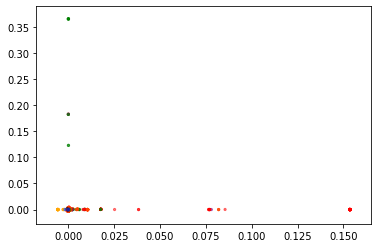

In [14]:
plt.scatter(X_transformed2[:,0], X_transformed2[:,1], c=cs, s=5, alpha=0.5)
# draw centers
plt.show()

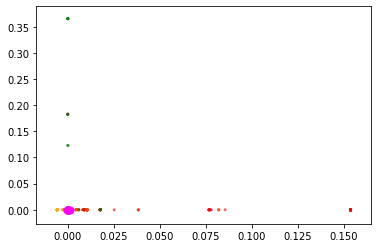

In [15]:
R = recomendeishon[:10]
X_transformed2 = np.array(X_transformed2)
recommended2 = X_transformed2[R]
c_r = c[R]
plt.scatter(X_transformed2[:,0], X_transformed2[:,1], c=cs, s=4, alpha=0.5)
plt.scatter(recommended2[:,0], recommended2[:,1], c='fuchsia', s=50, alpha=0.9)
plt.show()

### PCA

In [19]:
number_components = 3
print ('... Creating manifold LocallyLinearEmbedding method')
pca = decomposition.PCA(n_components=number_components)
XT_pca = pca.fit_transform(tagged_data)
print ('... Done.')
print (f'\t Data shape is {XT_pca.shape}')
if number_components == 2:
    cs = c
elif number_components == 3:
    cs = XT_pca[:,2]
else:
    cs = c

... Creating manifold LocallyLinearEmbedding method
... Done.
	 Data shape is (9742, 3)


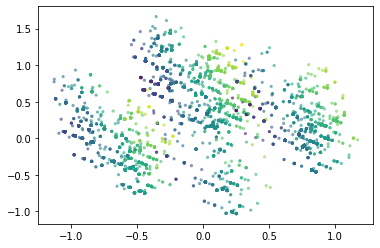

In [20]:
plt.scatter(XT_pca[:,0], XT_pca[:,1], c=cs, s=5, alpha=0.5)
# draw centers
plt.show()

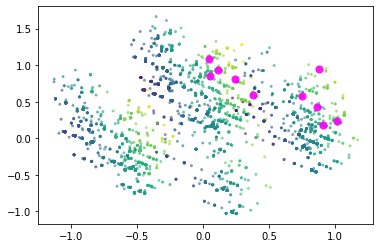

In [21]:
# Get the 10 recomendeishons printed before
R = recomendeishon[:10]
recommended = XT_pca[R]
c_r = c[R]
plt.scatter(XT_pca[:,0], XT_pca[:,1], c=cs, s=4, alpha=0.5)
plt.scatter(recommended[:,0], recommended[:,1], c='fuchsia', s=50, alpha=0.9)
plt.show()